# Lasso

In [1]:
#path=  'C:/Users/felipe/Documents/Brain/'
path = 'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'

#import sys
#sys.path.append(path) 
#path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'

import sys
sys.path.append(path_) 

In [7]:
path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [8]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
model = LassoRegressor()
Plotters = Plotter()

In [10]:
nameset ='Lasso'

In [11]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Aging/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Aging/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Aging/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

df_patient = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

# Hyperparameter Tuning

In [7]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [9]:
with open(f'results_model/opt_Lasso.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'results_model/opt_Lasso.pickle', 'rb') as file:
    opt_model= pickle.load(file)

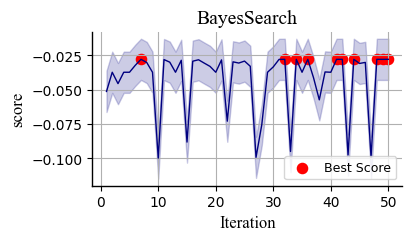

Top 1: Iteration 50, Score -0.027811583486427916
Top 2: Iteration 34, Score -0.027811678083241243
Top 3: Iteration 36, Score -0.02781229490348568
Top 4: Iteration 44, Score -0.02781263877809238
Top 5: Iteration 32, Score -0.027814389725588695
Top 6: Iteration 48, Score -0.027815683762982955
Top 7: Iteration 42, Score -0.02781599880323201
Top 8: Iteration 7, Score -0.027821057566171425
Top 9: Iteration 49, Score -0.02783691702625557
Top 10: Iteration 41, Score -0.027837921178240597


In [9]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [10]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.29558799396387586, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.2958126432770518, 'max_iter': 1282, 'tol': 1e-05},
 {'alpha': 0.2966923377348664, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.291097250347601, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.2914434715164627, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.29810408892902884, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.2942076695958066, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.29397976202716886,
  'max_iter': 7776,
  'tol': 0.0001194177256833917},
 {'alpha': 0.3028286023637455, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.3052212878764018, 'max_iter': 100, 'tol': 1e-05}]

# Training

In [10]:
results_labels_df_CN_train, results_labels_df_CN_test, results_patient_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_patient= model.trainer(df_CN=df_concatenado_CN,df_patient= df_patient, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:214: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

In [39]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_patient_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_patient]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [8]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_patient_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_patient = loaded_results

In [11]:
results_labels_df_AD=results_patient_list[0]
results_labels_df_FTD=results_patient_list[1]
results_labels_df_MCI=results_patient_list[2]
results_labels_df_PD=results_patient_list[3]

results_labels_df_total = [results_labels_df_CN_test, results_labels_df_AD, results_labels_df_FTD,results_labels_df_MCI,results_labels_df_PD]

results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]
results_avg_list_PD = results_avg_list[4]

df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = results_avg_list_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = results_avg_list_FTD.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = results_avg_list_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')

df_PD_seleccion = df_PD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_PD_combined = results_avg_list_PD.merge(df_PD_seleccion, on='ID-unique', how='left')


In [118]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_results.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_results.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_results.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_results.xlsx', index=False)
df_PD_combined.to_excel('results/df_PD_results.xlsx', index=False)


C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


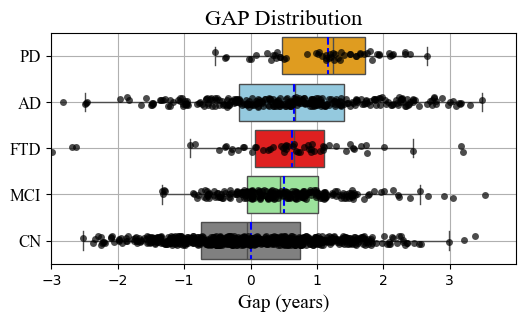

In [12]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])
corrected_gap_PD = pd.to_numeric(results_avg_list[4]['GAP_corrected'])

data = {
    'Error': np.concatenate([corrected_gap_PD, corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['PD'] * len(corrected_gap_PD) + ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

CN - Pendiente: 0.009117038929091627, Intercepto: 65.47987546437813
AD - Pendiente: 0.03919136098266398, Intercepto: 64.03120113940082
FTD - Pendiente: -0.01871850799740955, Intercepto: 68.10112754094752
MCI - Pendiente: 0.004079408462375373, Intercepto: 66.33299978255486
PD - Pendiente: 0.002589291304406631, Intercepto: 67.04470231844776


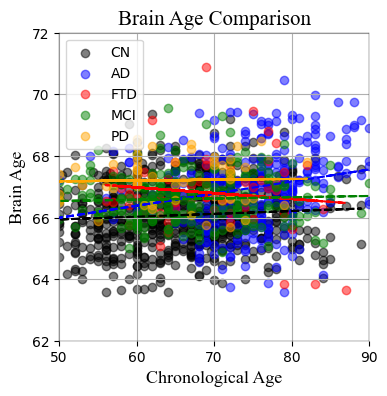

In [13]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred']].copy()
results_avg_FTD     = results_avg_list[2][['y_labels', 'y_pred']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred']].copy()
results_avg_PD = results_avg_list[4][['y_labels', 'y_pred']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI, results_avg_PD]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green', 'PD': 'orange'}
labels = ['CN', 'AD', 'FTD', 'MCI', 'PD']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=62,x_max_limit=90,y_max_limit=72,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)

# SHAP

In [14]:
import shap
import numpy as np
import pandas as pd

def shap_values_calculate(df_train, df_test, results_per_fold_train, results_per_fold_test, results_model, feature_col_range):
    shap_values_dict = {id_unique: [] for id_unique in df_test['ID-unique'].unique()}
    
    for i in range(20):
        for k in range(10):

            # Train
            ID_train_fold = results_per_fold_train[i][k]['ID-unique']
            df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
            X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
            y_train_kf = df_train_fold.iloc[:, -2]  # Labels

            # Test
            ID_test_fold = results_per_fold_test[i][k]['ID-unique']
            df_test_fold = df_test[df_test['ID-unique'].isin(ID_test_fold)]
            X_test_kf = df_test_fold.iloc[:, feature_col_range]  # Features
            y_test_kf = df_test_fold.iloc[:, -2]  # Labels

            # Scaling
            mean_X_train_kf = results_model['mean_X_train_kf'][k + 10 * i]
            std_X_train_kf = results_model['std_X_train_kf'][k + 10 * i]

            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_kf_scaled = (X_test_kf - mean_X_train_kf) / std_X_train_kf

            model_ = results_model['model'][k + 10 * i]

            # SHAP calculation
            explainer = shap.Explainer(model_, X_train_kf_scaled)
            shap_values = explainer.shap_values(X_test_kf_scaled)

            # Store SHAP values
            for idx, id_unique in enumerate(df_test_fold['ID-unique']):
                shap_values_dict[id_unique].append(shap_values[idx])

    # Average SHAP values
    shap_values_avg_dict = {id_unique: np.mean(values, axis=0) for id_unique, values in shap_values_dict.items()}

    # Prepare SHAP summary matrix
    shap_values_avg_matrix = [shap_values_avg_dict[id_unique] for id_unique in df_test['ID-unique'].unique()]
    shap_values_avg_array = np.array(shap_values_avg_matrix)

    feature_names = X_test_kf_scaled.columns.tolist()

    shap_values_df = pd.DataFrame(shap_values_avg_array, columns=feature_names)
    shap_values_df['ID-unique'] = df_test['ID-unique'].unique()
    shap_values_df.set_index('ID-unique', inplace=True)

    # SHAP summary
    shap_sum = np.abs(shap_values_avg_array).sum(axis=0)
    shap_summary = {feature: shap_sum[i] for i, feature in enumerate(feature_names)}
    shap_summary_sorted = sorted(shap_summary.items(), key=lambda x: x[1], reverse=True)

    return shap_values_avg_array, shap_summary_sorted



In [43]:
shap_values_CN, shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'], slice(None, -2)
)

shap_values_AD, shap_summary_sorted_AD = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_AD, results_per_fold_CN_train, results_per_fold_patient[0], results_model['model'], slice(None, -2)
)

shap_values_FTD, shap_summary_sorted_FTD = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_FTD, results_per_fold_CN_train, results_per_fold_patient[1], results_model['model'], slice(None, -2)
)

shap_values_MCI, shap_summary_sorted_MCI = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_MCI, results_per_fold_CN_train, results_per_fold_patient[2], results_model['model'], slice(None, -2)
)

shap_values_PD, shap_summary_sorted_PD = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_PD, results_per_fold_CN_train, results_per_fold_patient[3], results_model['model'], slice(None, -2)
)


Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_HPC_right: 285.8878552001631
Alpha2_canon_EPP_PARIET_left: 174.58421684061182
Low_subj_spec_EPP_OCC_right: 145.5256814880241
Low_subj_spec_RPD_HPC_left: 102.52621141962956
IAF_ORB_left: 95.65846538541494
IAF_INS_right: 87.22063614778378
IAF_HPC_left: 80.40706073980085
TF_IFG_right: 57.289326796566186
Low_subj_spec_EPP_HPC_left: 53.81689631212467
TF_INS_left: 34.20271429918541
Low_subj_spec_RPD_PARIET_right: 33.169255551993786
Alpha2_canon_EPP_PARIET_right: 25.65614445933542
TF_HPC_left: 22.36296339943664
IAF_INS_left: 21.437273443505322
Low_subj_spec_EPP_OCC_left: 17.79125493337754
IAF_HPC_right: 17.320196278369103
High_subj_spec_EPP_HPC_left: 10.601934544860459
IAF_OCC_left: 7.906001942412921
Alpha2_canon_RPD_PARIET_left: 6.998107496640074
Low_subj_spec_EPP_CING_left: 6.59050954143905
TF_SFG_right: 4.909410367611826
TF_ORB_right: 4.298181099365395
Low_subj_spec_EPP_CING_right: 3.379420940500757
High_subj_

In [68]:
with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_AD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_AD.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_FTD, f)

with open('results_model/shap_values_FTD.pkl', 'wb') as f:
    pickle.dump(shap_values_FTD, f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_MCI, f)

with open('results_model/shap_values_MCI.pkl', 'wb') as f:
    pickle.dump(shap_values_MCI, f)

with open('results_model/shap_summary_sorted_PD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_PD, f)

with open('results_model/shap_values_PD.pkl', 'wb') as f:
    pickle.dump(shap_values_PD, f)

In [1]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_AD.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_AD.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'rb') as f:
    shap_summary_sorted_FTD = pickle.load(f)

with open('results_model/shap_values_FTD.pkl', 'rb') as f:
    shap_values_FTD = pickle.load(f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'rb') as f:
    shap_summary_sorted_MCI = pickle.load(f)

with open('results_model/shap_values_MCI.pkl', 'rb') as f:
    shap_values_MCI = pickle.load(f)

with open('results_model/shap_summary_sorted_PD.pkl', 'rb') as f:
    shap_summary_sorted_PD = pickle.load(f)

with open('results_model/shap_values_PD.pkl', 'rb') as f:
    shap_values_PD = pickle.load(f)



In [5]:
shap_summary_sorted_CN

[('Low_subj_spec_RPD_HPC_right', 285.8878552001631),
 ('Alpha2_canon_EPP_PARIET_left', 174.58421684061182),
 ('Low_subj_spec_EPP_OCC_right', 145.5256814880241),
 ('Low_subj_spec_RPD_HPC_left', 102.52621141962956),
 ('IAF_ORB_left', 95.65846538541494),
 ('IAF_INS_right', 87.22063614778378),
 ('IAF_HPC_left', 80.40706073980085),
 ('TF_IFG_right', 57.289326796566186),
 ('Low_subj_spec_EPP_HPC_left', 53.81689631212467),
 ('TF_INS_left', 34.20271429918541),
 ('Low_subj_spec_RPD_PARIET_right', 33.169255551993786),
 ('Alpha2_canon_EPP_PARIET_right', 25.65614445933542),
 ('TF_HPC_left', 22.36296339943664),
 ('IAF_INS_left', 21.437273443505322),
 ('Low_subj_spec_EPP_OCC_left', 17.79125493337754),
 ('IAF_HPC_right', 17.320196278369103),
 ('High_subj_spec_EPP_HPC_left', 10.601934544860459),
 ('IAF_OCC_left', 7.906001942412921),
 ('Alpha2_canon_RPD_PARIET_left', 6.998107496640074),
 ('Low_subj_spec_EPP_CING_left', 6.59050954143905),
 ('TF_SFG_right', 4.909410367611826),
 ('TF_ORB_right', 4.2981810

In [3]:
import pandas as pd

# Función para guardar un shap summary en un archivo Excel
def save_shap_summary_to_excel(shap_summary, filename):
    # Crear un DataFrame a partir del shap_summary
    df = pd.DataFrame(shap_summary, columns=['Feature', 'SHAP Value'])
    # Guardar el DataFrame en un archivo Excel
    df.to_excel(filename, index=False)

# Guardar cada shap summary en un archivo Excel
save_shap_summary_to_excel(shap_summary_sorted_CN, 'shap_summary_sorted_CN.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_AD, 'shap_summary_sorted_AD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_FTD, 'shap_summary_sorted_FTD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_MCI, 'shap_summary_sorted_MCI.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_PD, 'shap_summary_sorted_PD.xlsx')


# SHAP CN

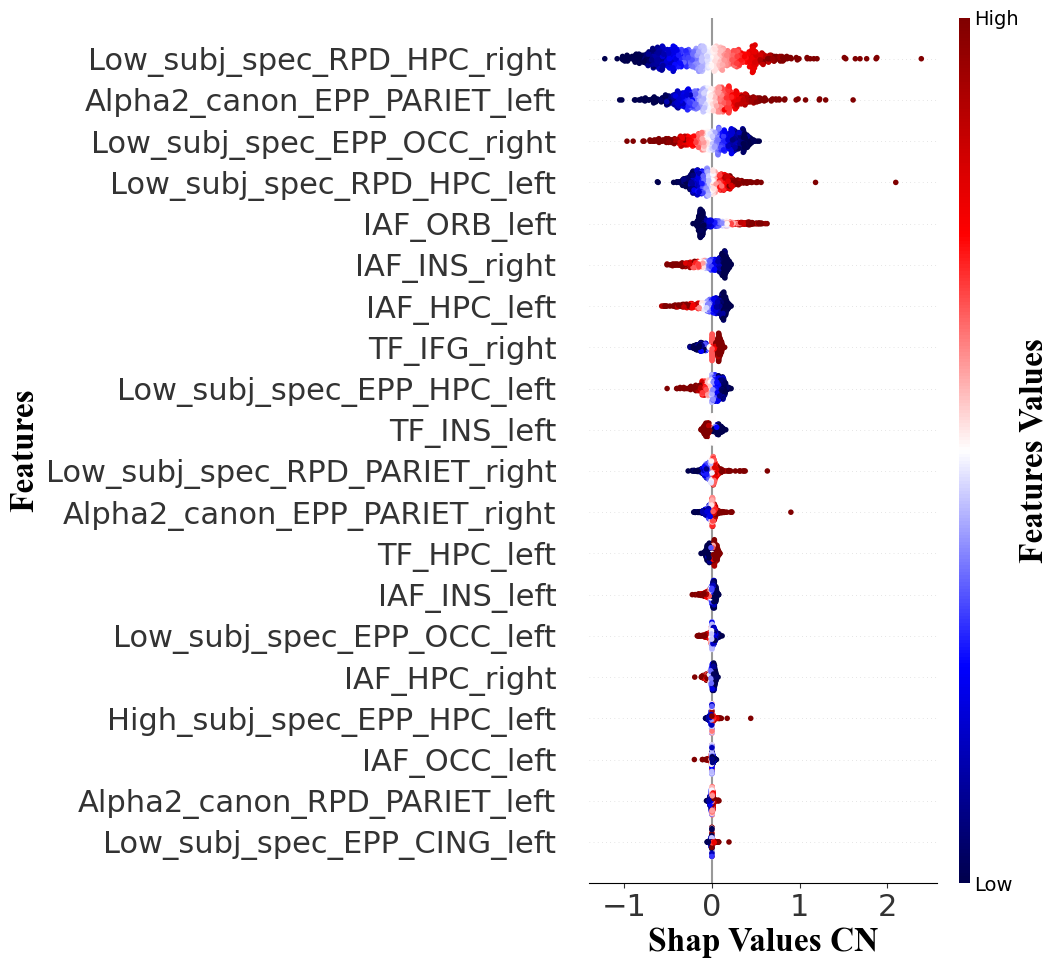

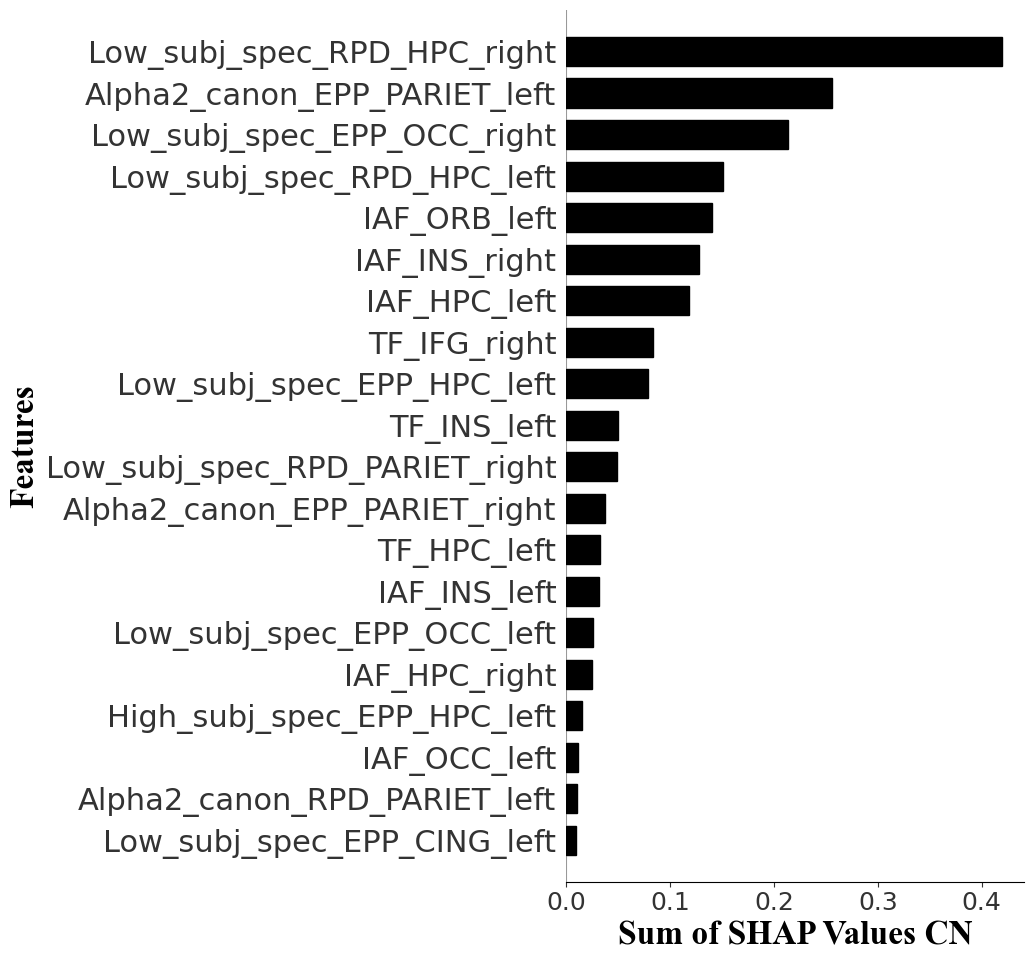

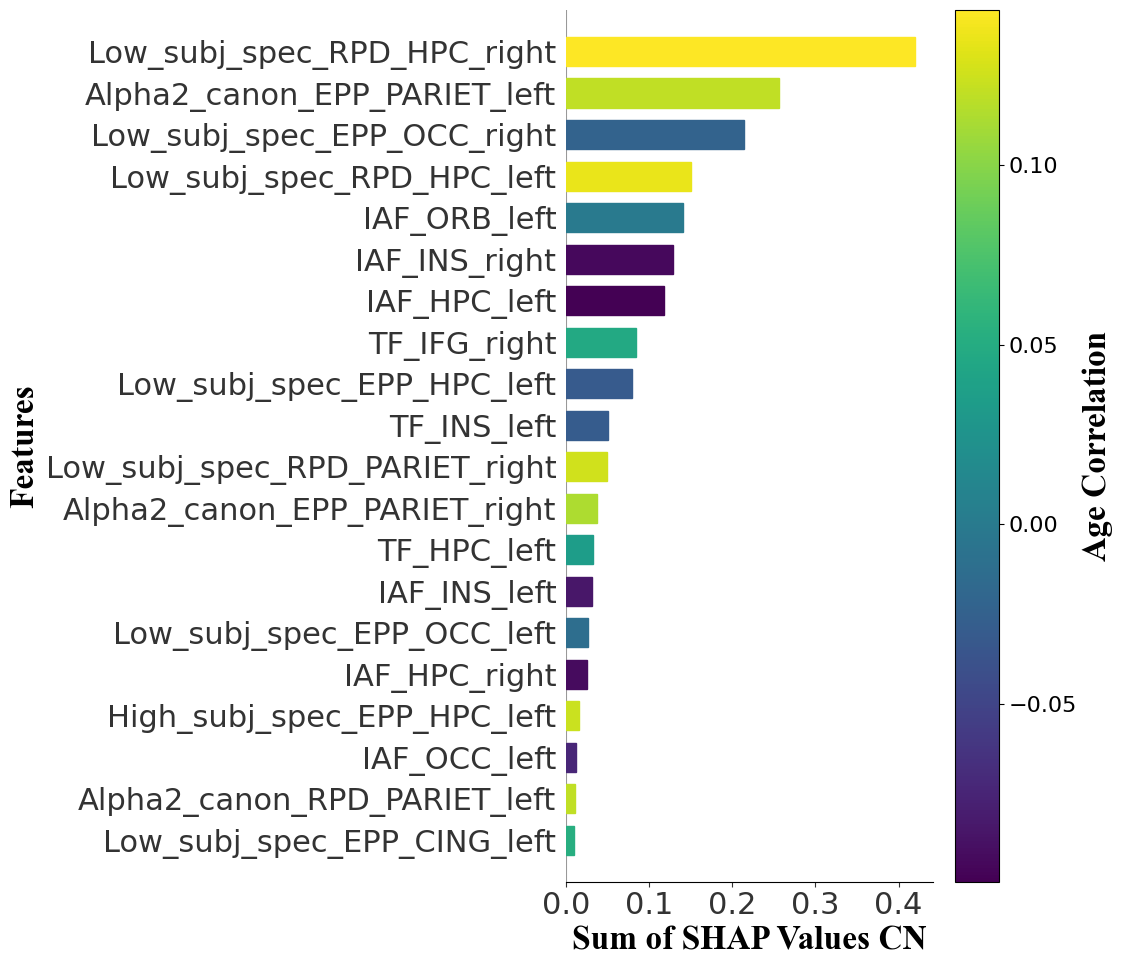

In [15]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [37]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_right: 1.000000
HPC_left: 0.889538
PARIET_left: 0.598870
OCC_right: 0.479953
ORB_left: 0.315488
INS_right: 0.287659
PARIET_right: 0.194010
IFG_right: 0.188944
INS_left: 0.183504
OCC_left: 0.084751
CING_left: 0.021736


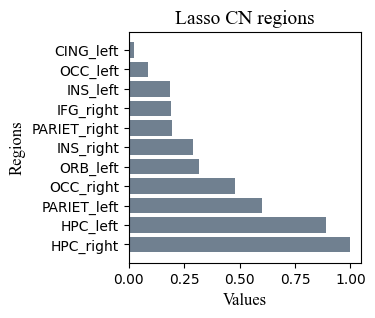

In [38]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'{nameset} CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

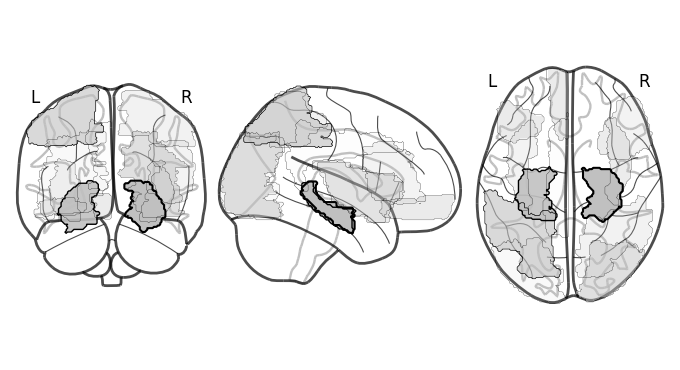

In [40]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

# SHAP AD

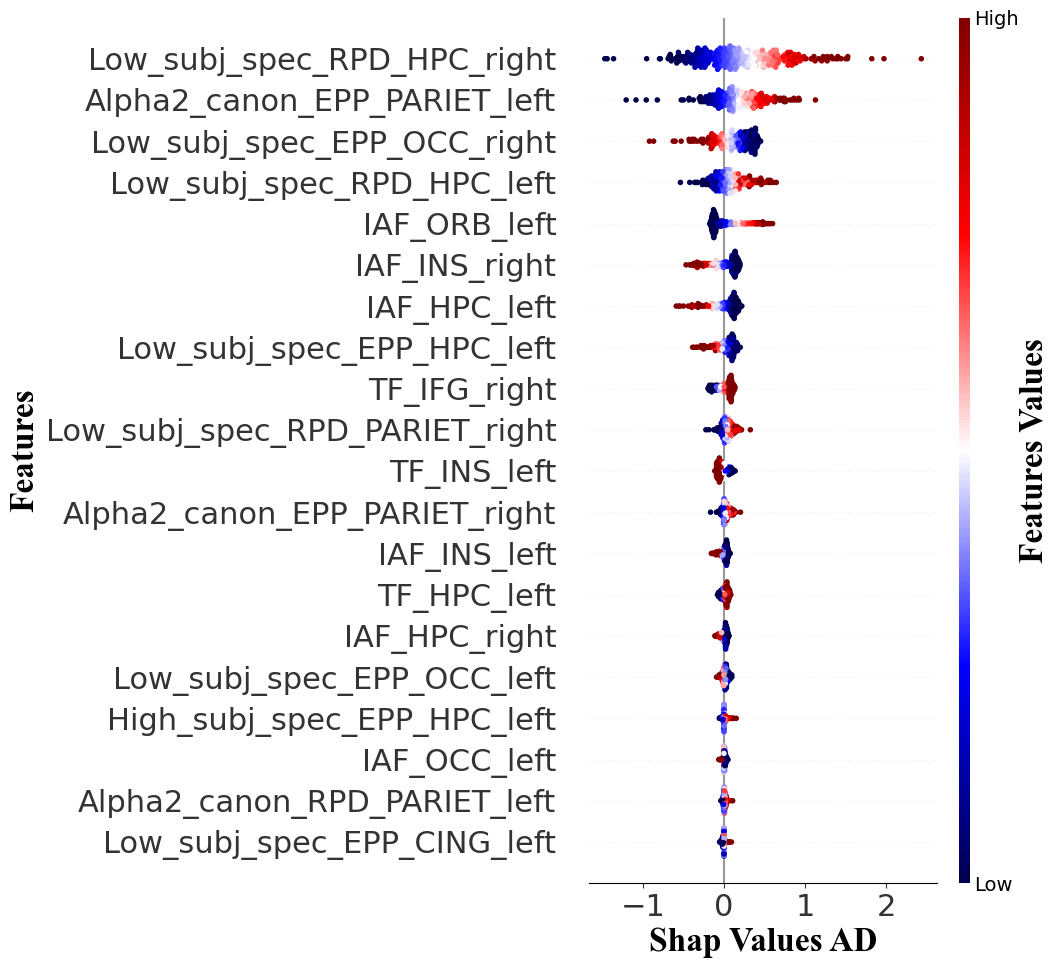

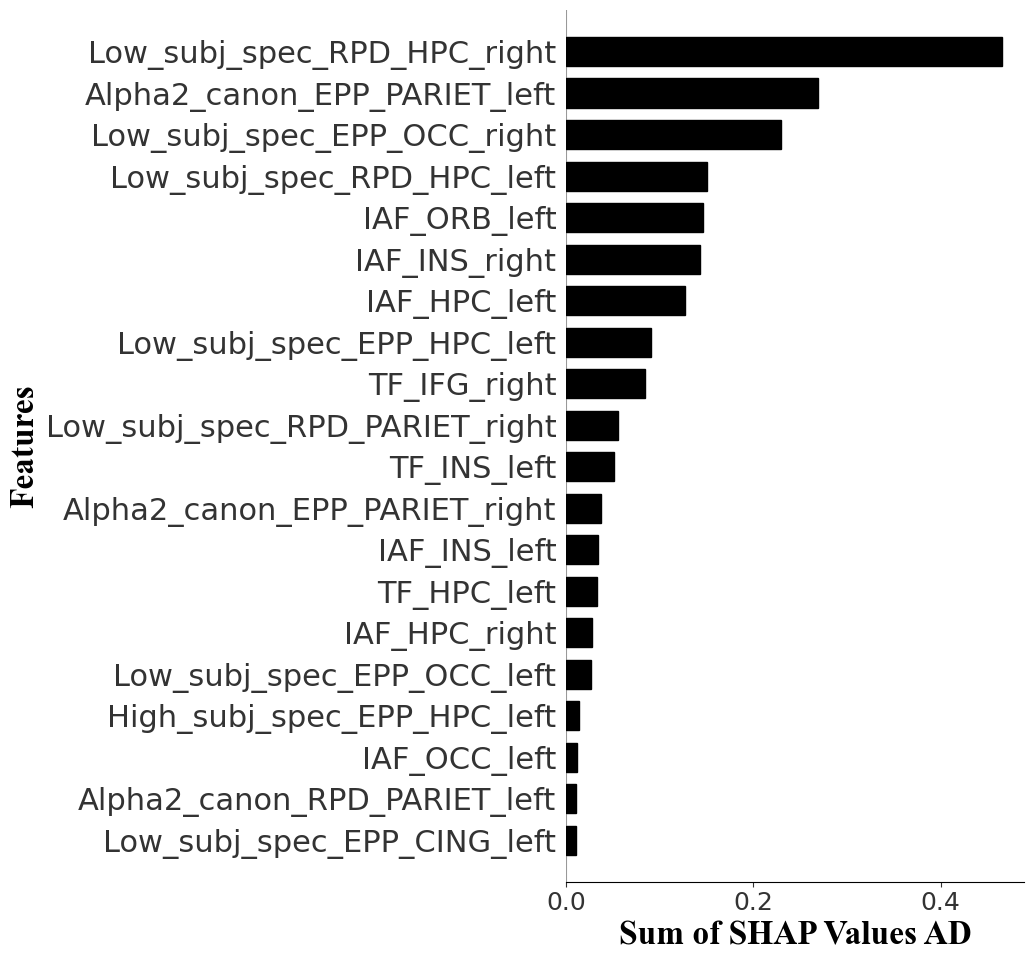

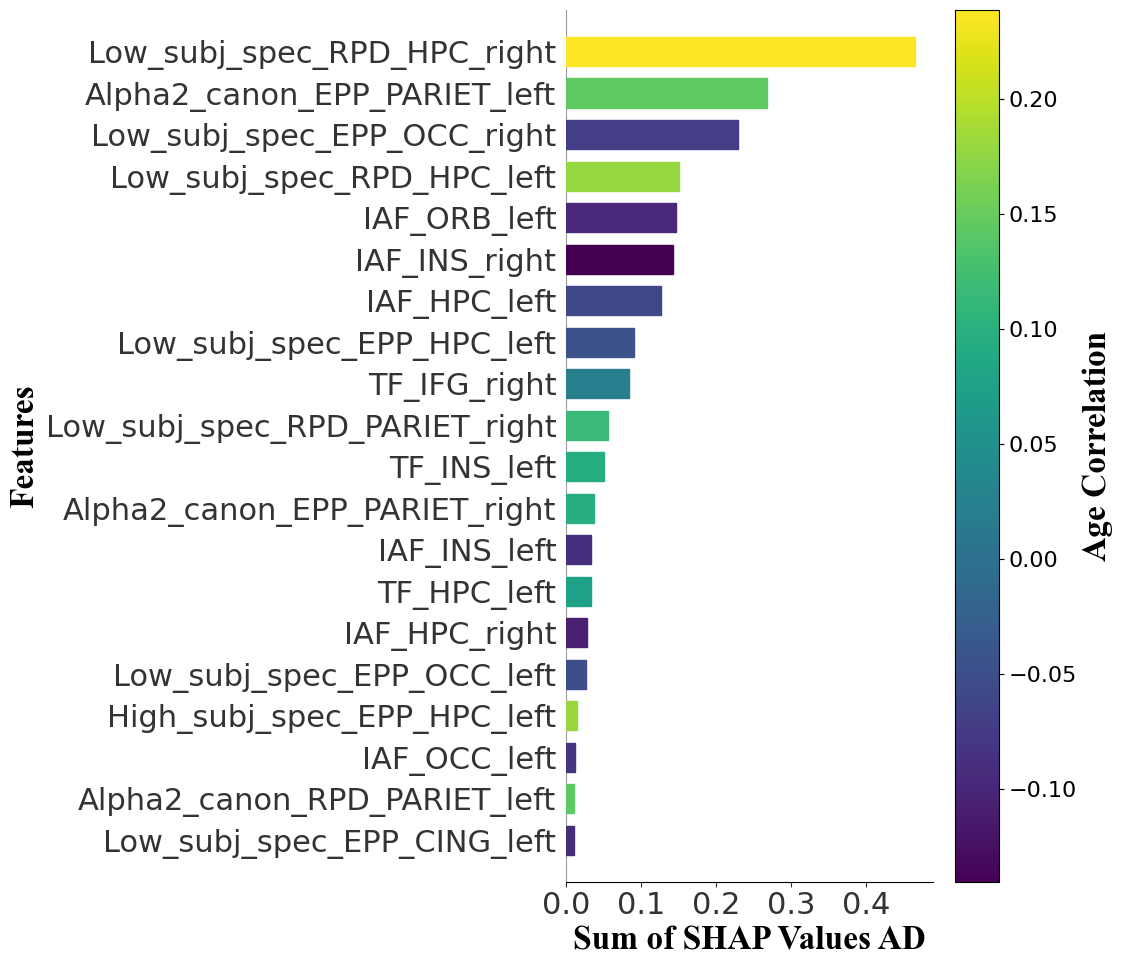

In [44]:
Plotters.plot_feature_importance(shap_values=shap_values_AD,X_test=X_AD,y_test=y_AD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values AD', xlabel2='Sum of SHAP Values AD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [13]:
shap_per_region_sorted_AD, normalized_result_sorted_AD=model.shap_region(shap_summary_sorted=shap_summary_sorted_AD, num_max=20)

HPC_right: 1.000000
HPC_left: 0.840963
PARIET_left: 0.565186
OCC_right: 0.464406
ORB_left: 0.296264
INS_right: 0.288746
PARIET_right: 0.187851
INS_left: 0.172002
IFG_right: 0.169936
OCC_left: 0.078723
CING_left: 0.021462


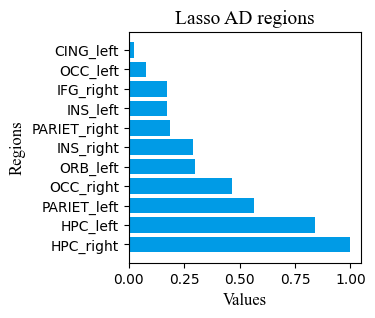

In [19]:
Plotters.plot_normalized_values(normalized_result_sorted_AD, color=(0/255, 155/255, 230/255, 1), name_set=f'{nameset} AD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

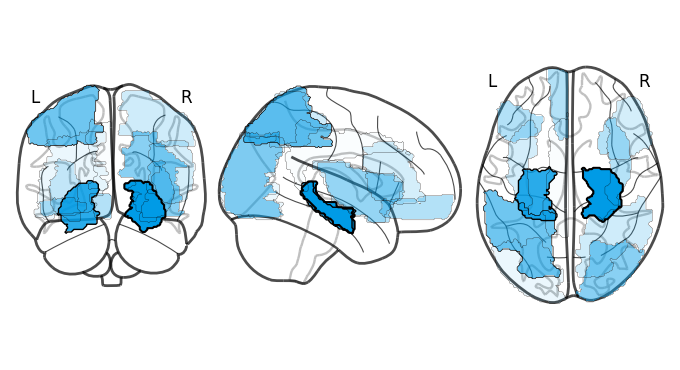

In [28]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color="#009BE6" )

# SHAP FTD

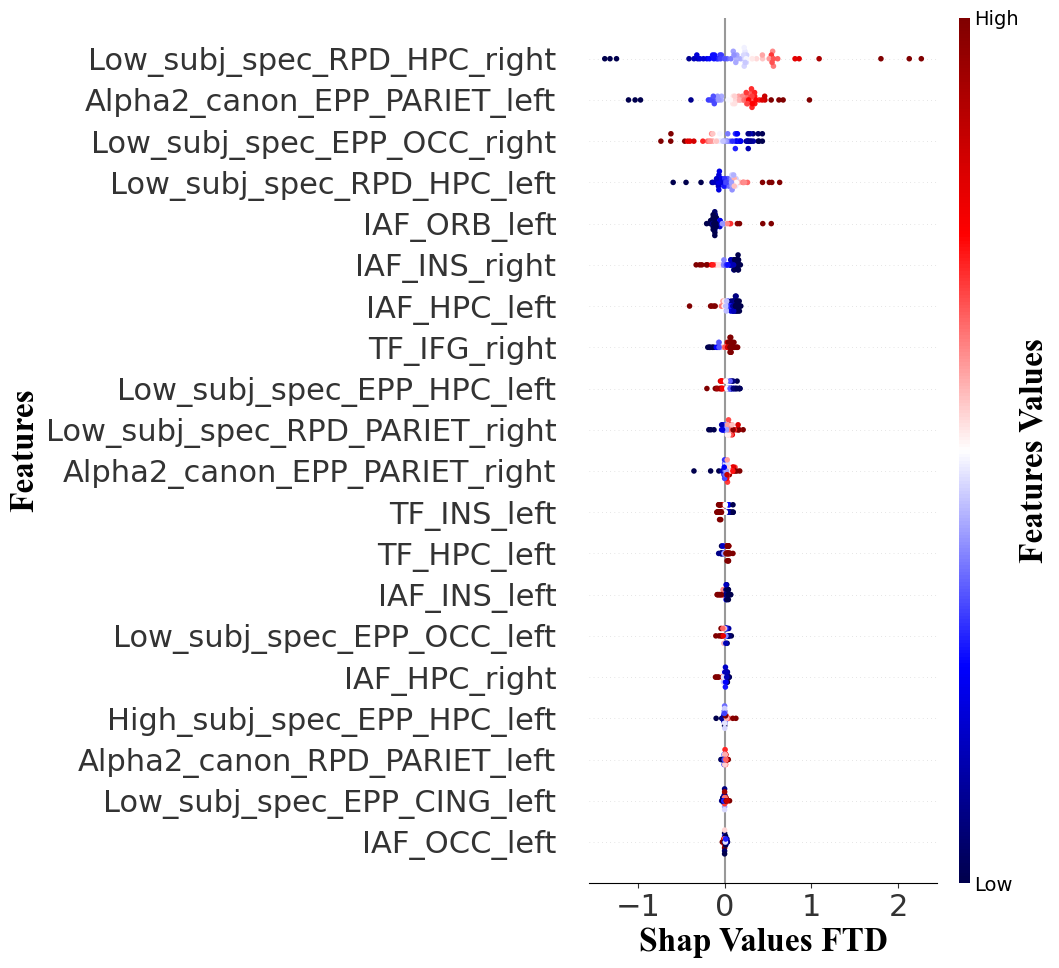

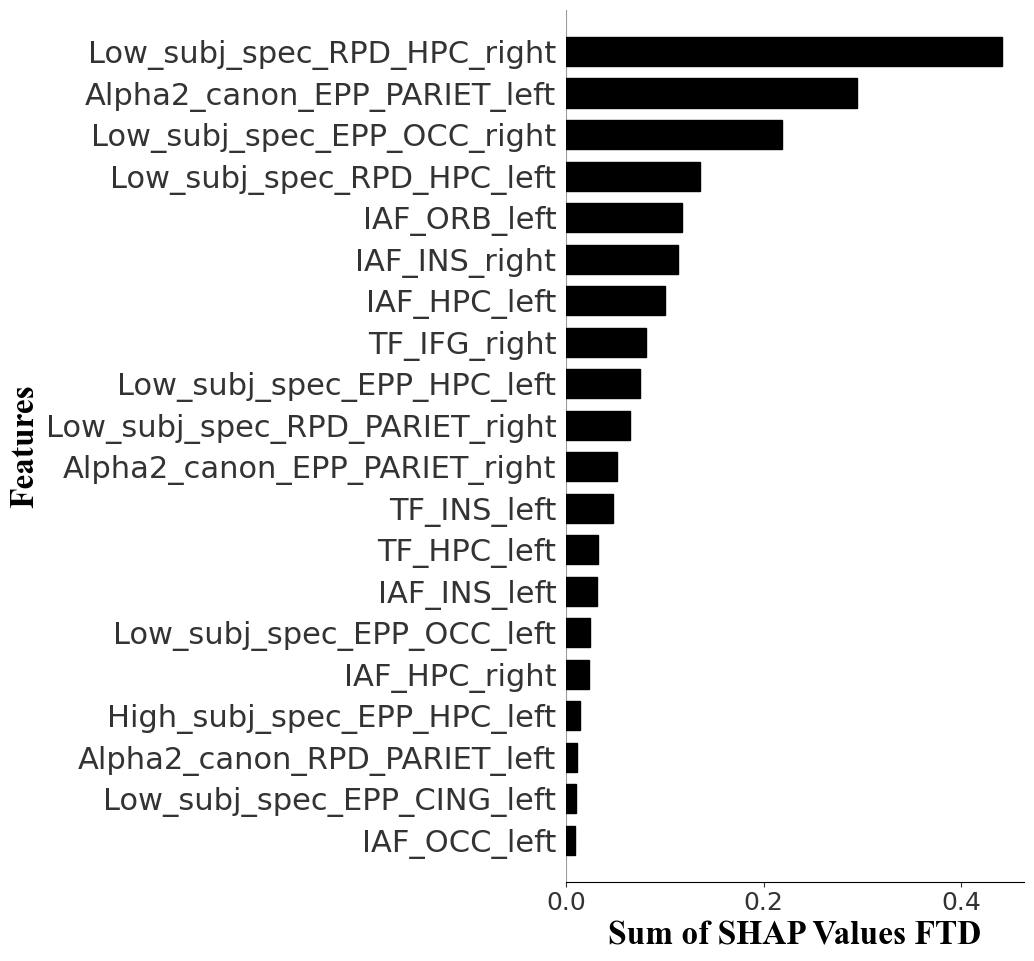

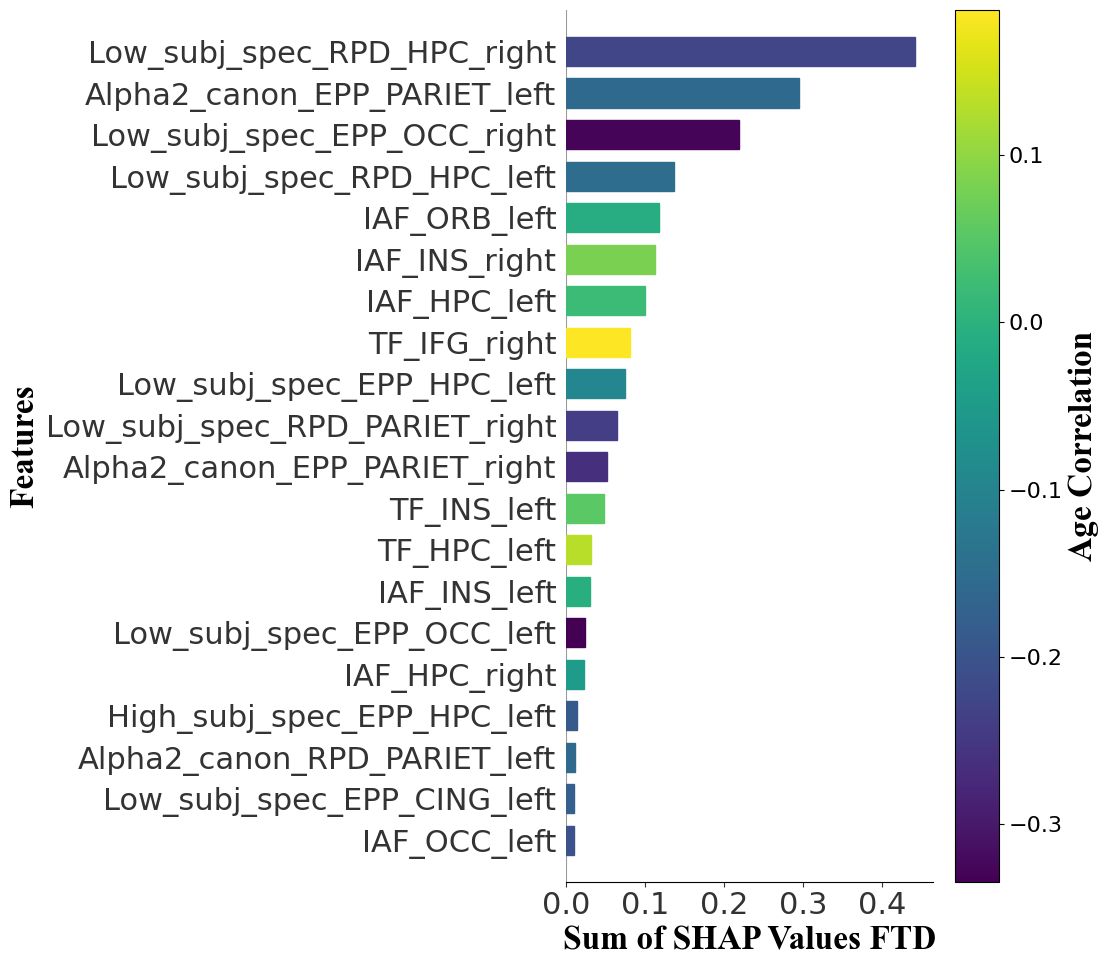

In [45]:
Plotters.plot_feature_importance(shap_values=shap_values_FTD,X_test=X_FTD,y_test=y_FTD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values FTD', xlabel2='Sum of SHAP Values FTD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [31]:
shap_per_region_sorted_FTD, normalized_result_sorted_FTD=model.shap_region(shap_summary_sorted=shap_summary_sorted_FTD, num_max=20)

HPC_right: 1.000000
HPC_left: 0.768216
PARIET_left: 0.658669
OCC_right: 0.469787
ORB_left: 0.251941
PARIET_right: 0.250151
INS_right: 0.242863
IFG_right: 0.174030
INS_left: 0.169198
OCC_left: 0.072587
CING_left: 0.020649


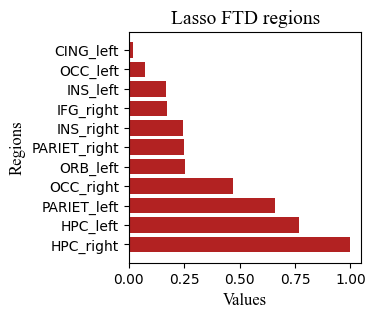

In [32]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='firebrick', name_set=f'{nameset} FTD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


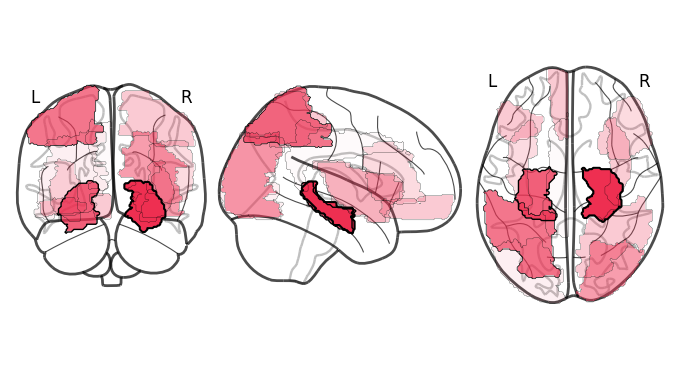

In [33]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color= '#EE2F51' )

# SHAP MCI

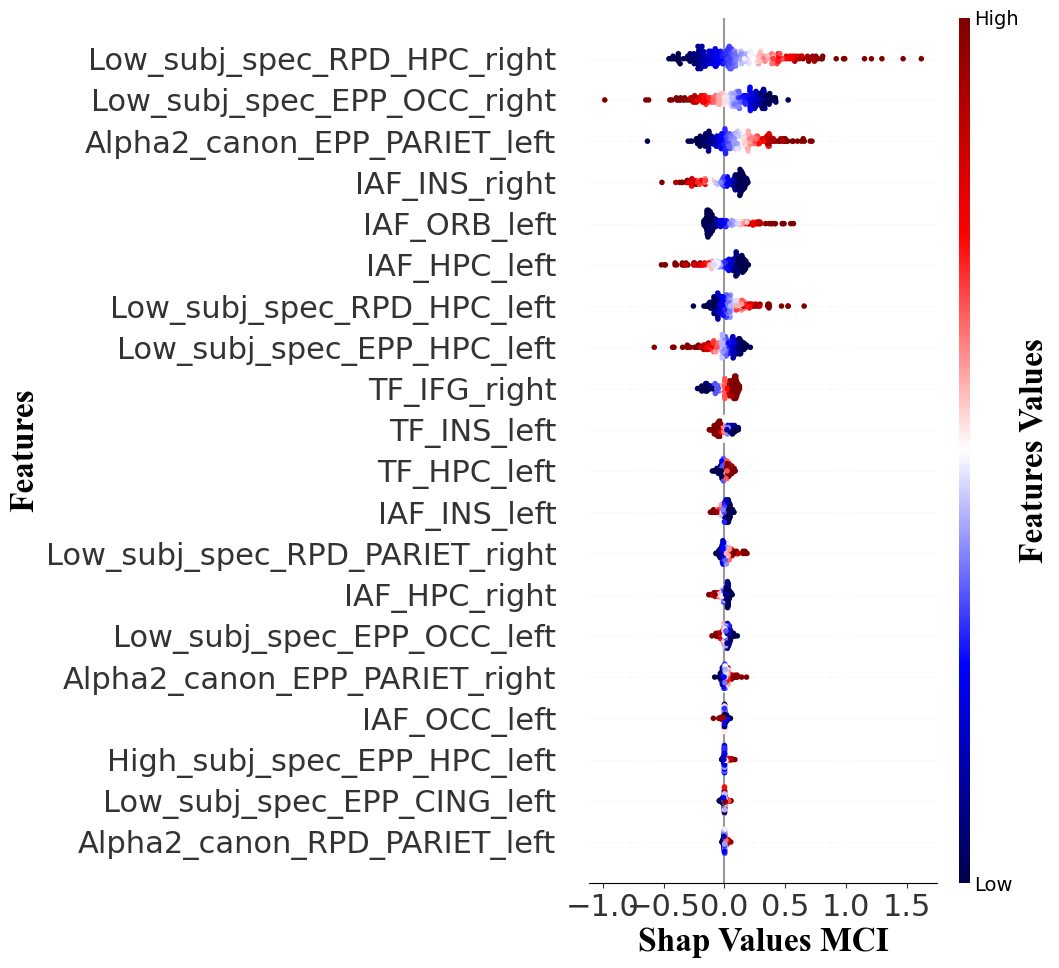

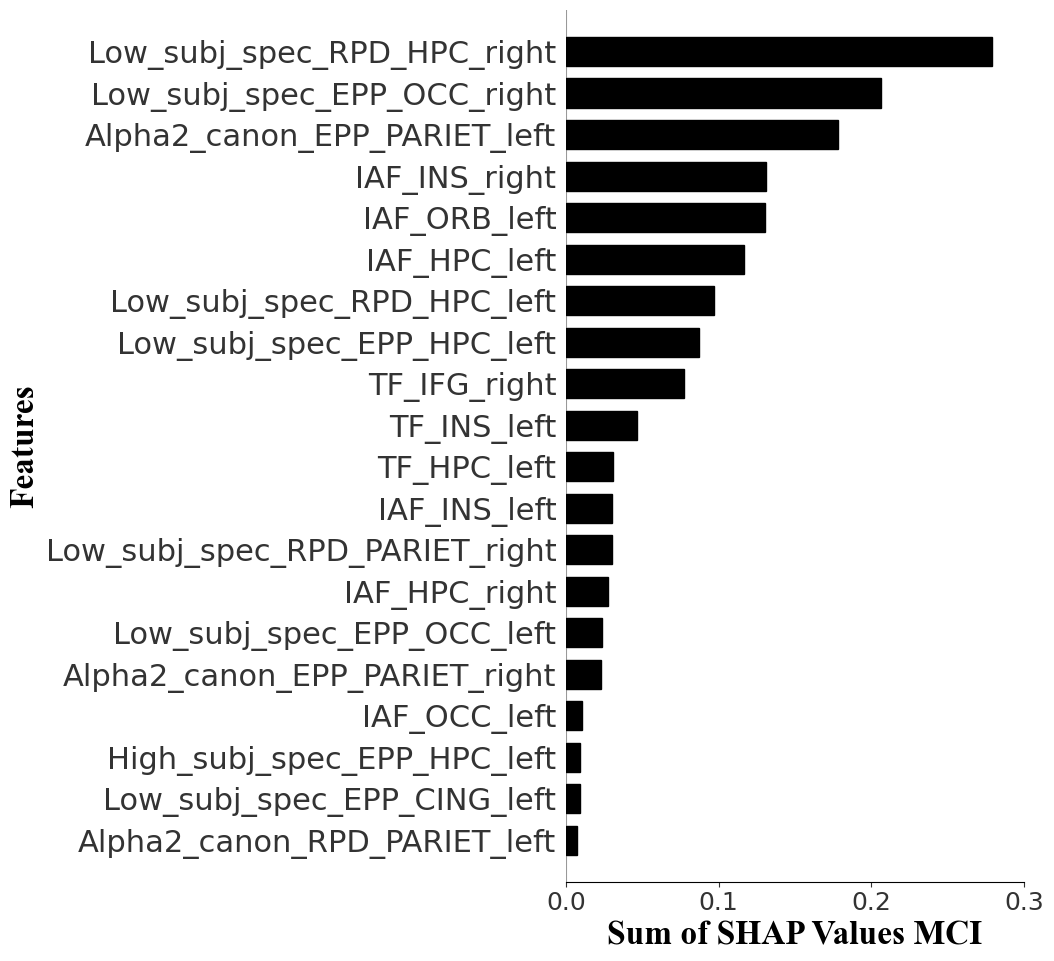

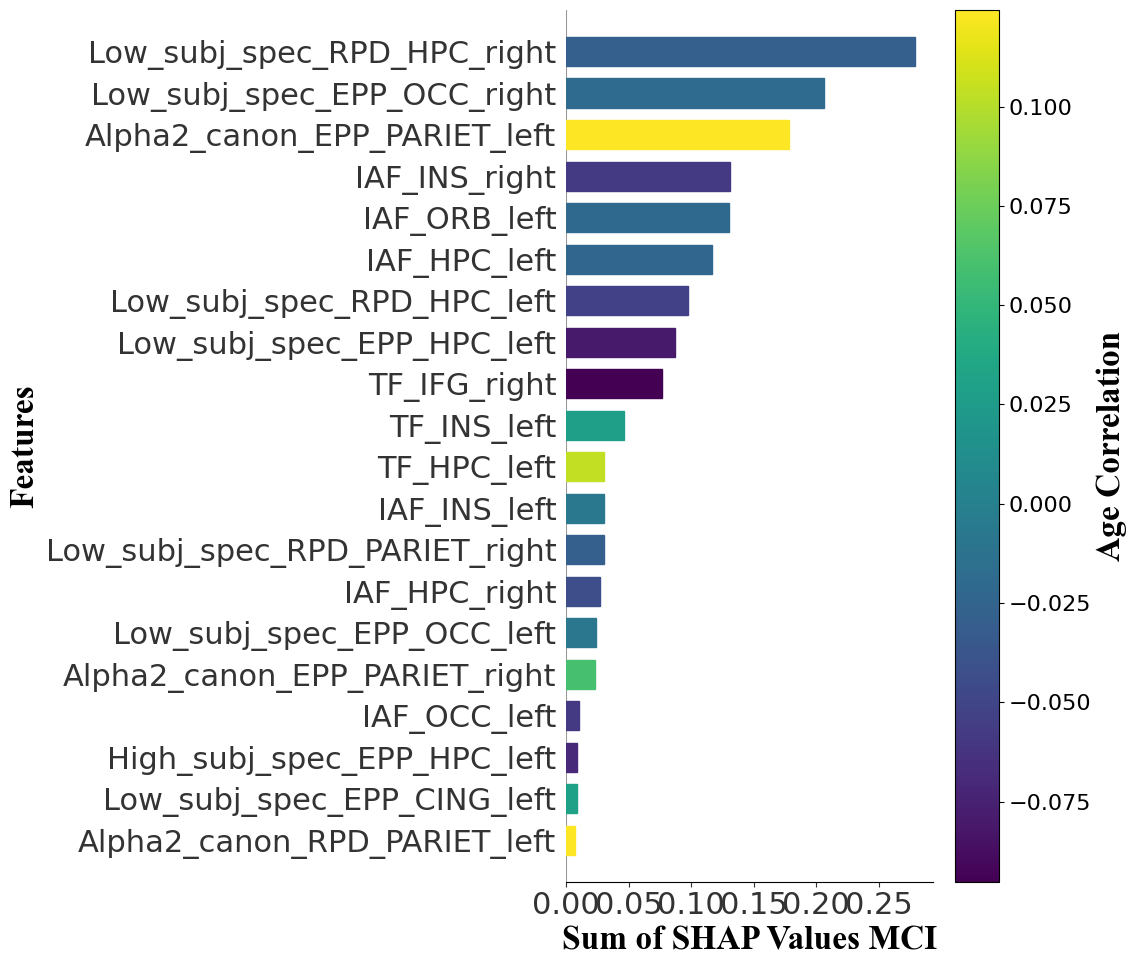

In [49]:
Plotters.plot_feature_importance(shap_values=shap_values_MCI,X_test=X_MCI,y_test=y_MCI, font= "Times New Roman", fontsize=24, xlabel1='Shap Values MCI', xlabel2='Sum of SHAP Values MCI',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [34]:
shap_per_region_sorted_MCI, normalized_result_sorted_MCI=model.shap_region(shap_summary_sorted=shap_summary_sorted_MCI, num_max=20)

HPC_left: 1.000000
HPC_right: 0.899983
OCC_right: 0.605797
PARIET_left: 0.545930
INS_right: 0.384707
ORB_left: 0.382367
IFG_right: 0.226049
INS_left: 0.225793
PARIET_right: 0.155125
OCC_left: 0.099935
CING_left: 0.026425


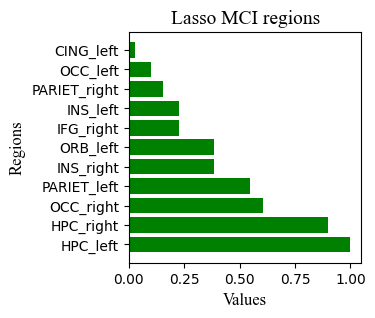

In [35]:
Plotters.plot_normalized_values(normalized_result_sorted_MCI, color='green', name_set=f'{nameset} MCI regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

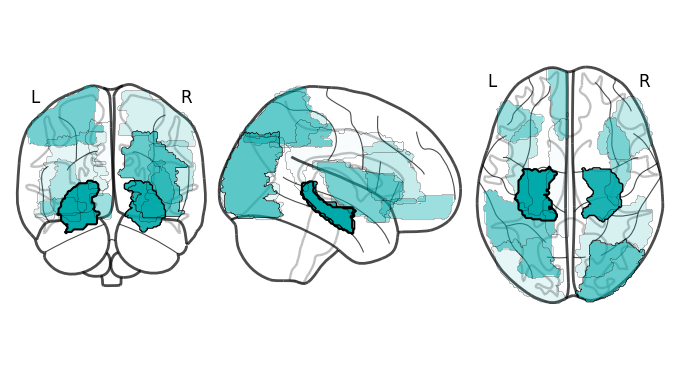

In [36]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='#00AAAA')

# SHAP PD

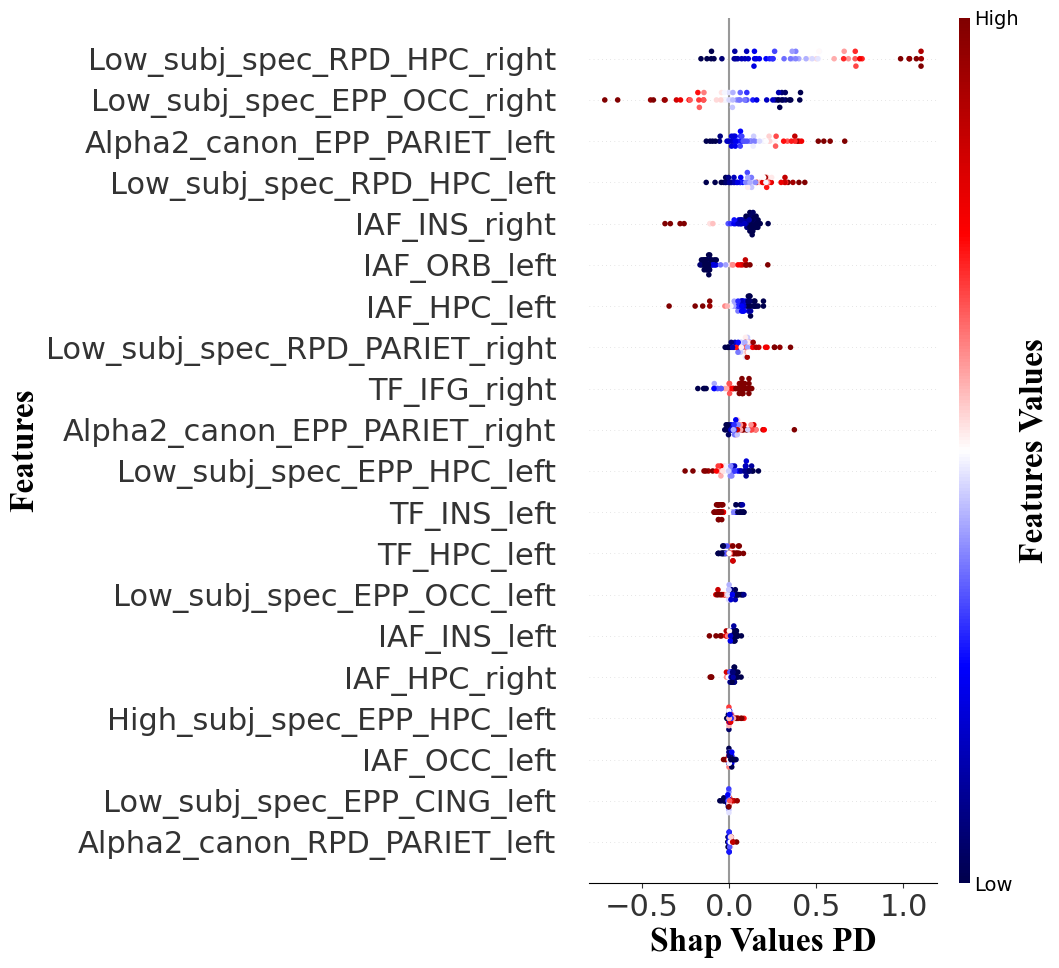

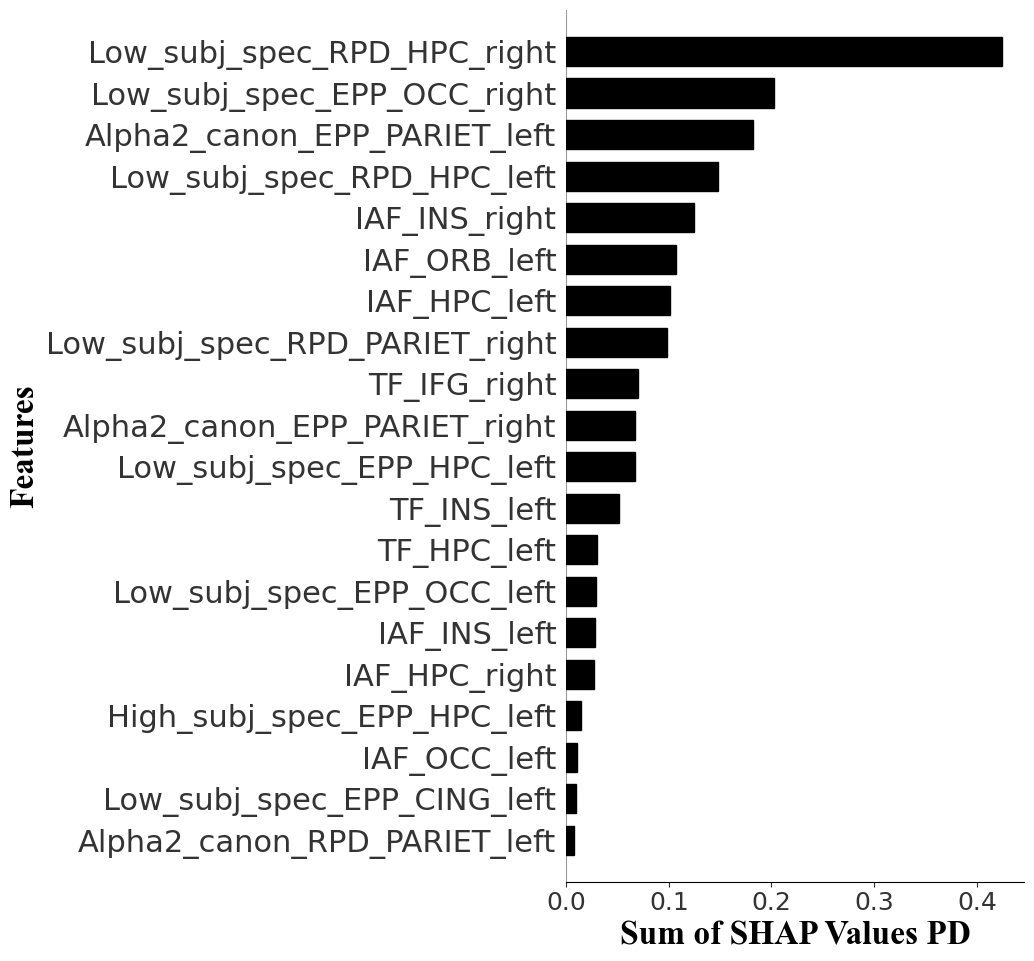

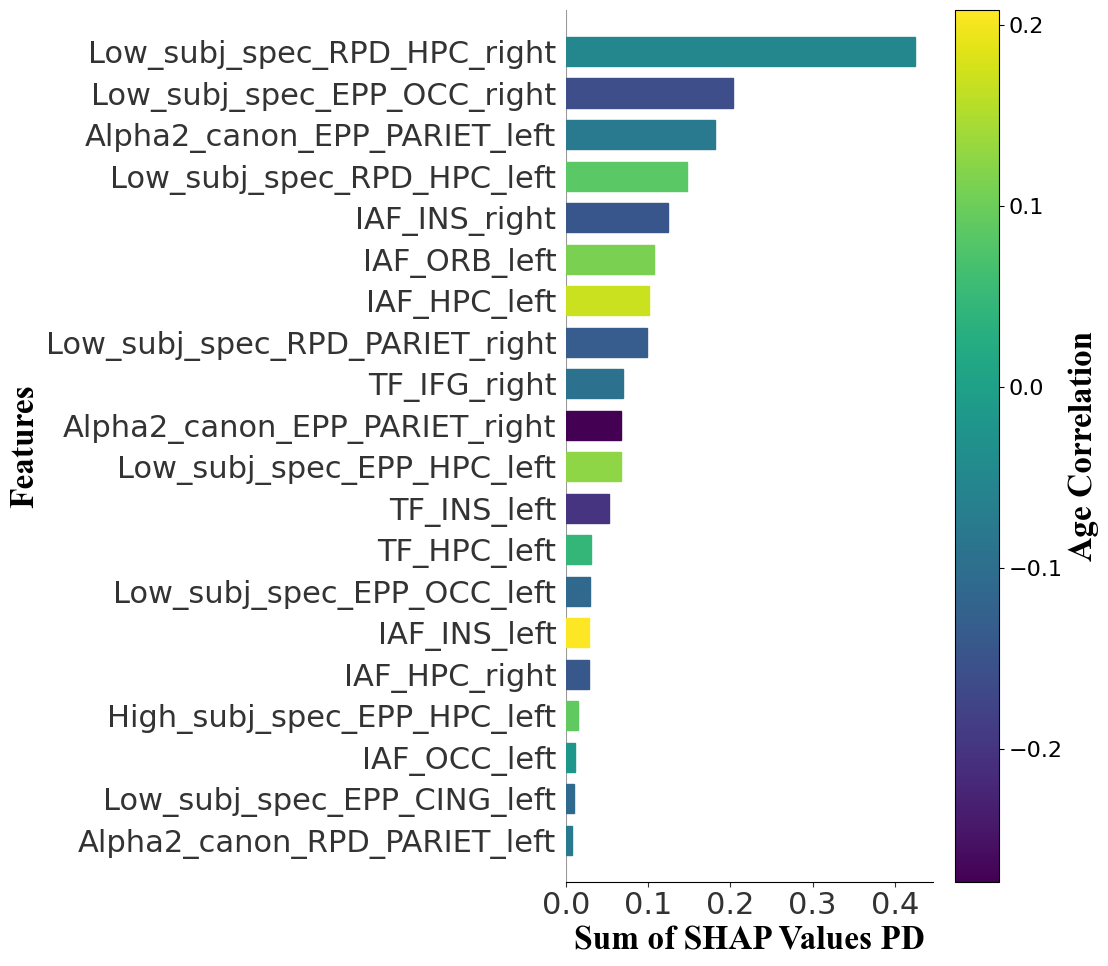

In [53]:
Plotters.plot_feature_importance(shap_values=shap_values_PD,X_test=X_PD,y_test=y_PD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values PD', xlabel2='Sum of SHAP Values PD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [60]:
shap_per_region_sorted_PD, normalized_result_sorted_PD=model.shap_region(shap_summary_sorted=shap_summary_sorted_PD, num_max=20)

HPC_right: 1.000000
HPC_left: 0.797813
OCC_right: 0.448547
PARIET_left: 0.417590
PARIET_right: 0.366169
INS_right: 0.275585
ORB_left: 0.235688
INS_left: 0.176357
IFG_right: 0.154032
OCC_left: 0.088221
CING_left: 0.020682


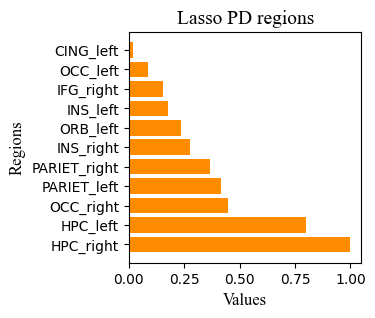

In [61]:
Plotters.plot_normalized_values(normalized_result_sorted_PD, color='darkorange', name_set=f'{nameset} PD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


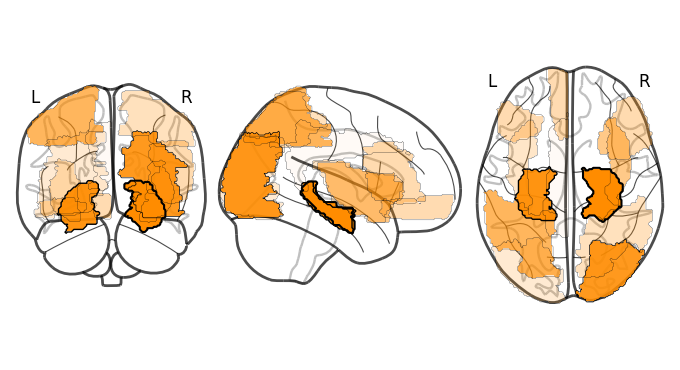

In [52]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_PD, base_path, color='darkorange')

# Associations

In [14]:
import pandas as pd

df_CN_combined = pd.read_excel('results/df_CN_combined.xlsx')
df_AD_combined = pd.read_excel('results/df_AD_combined.xlsx')
df_FTD_combined = pd.read_excel('results/df_FTD_combined.xlsx')
df_MCI_combined = pd.read_excel('results/df_MCI_combined.xlsx')
df_PD_combined = pd.read_excel('results/df_PD_combined.xlsx')



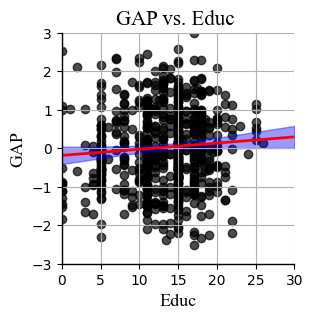

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo Educ < 30
df_filtered = df_CN_combined[df_CN_combined['Educ'] < 30]
Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['Educ'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=0,y_min_limit=-3,x_max_limit=30,y_max_limit=3,color='Black', title='GAP vs. Educ ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Educ',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)

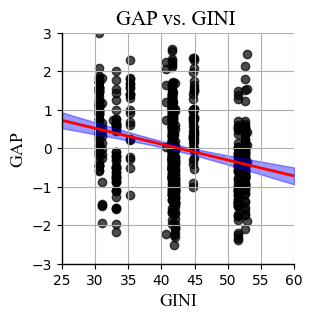

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo GINI < 30 y eliminar filas con valores nulos en GINI
df_filtered = df_CN_combined[(df_CN_combined['Educ'] < 30) & (df_CN_combined['GINI'].notna())]
Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['GINI'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=25,y_min_limit=-3,x_max_limit=60,y_max_limit=3,color='Black', title='GAP vs. GINI ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='GINI',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)

# SHAP agreement

In [166]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr
import numpy as np

# Recolectar las listas de características ordenadas para cada grupo
feature_ranks_CN = [feature for feature, _ in shap_summary_sorted_CN]
feature_ranks_AD = [feature for feature, _ in shap_summary_sorted_AD]
feature_ranks_FTD = [feature for feature, _ in shap_summary_sorted_FTD]
feature_ranks_MCI = [feature for feature, _ in shap_summary_sorted_MCI]
feature_ranks_PD = [feature for feature, _ in shap_summary_sorted_PD]

# Lista con todas las posiciones por grupo
feature_ranks = [feature_ranks_CN, feature_ranks_AD, feature_ranks_FTD, feature_ranks_MCI, feature_ranks_PD]

# Codificar los rangos usando LabelEncoder
le = LabelEncoder()
encoded_ranks = [le.fit_transform(rank) for rank in feature_ranks]

# Calcular la matriz de correlación (correlación de Spearman)
def compute_correlation(ranks):
    return np.array([[spearmanr(x, l).correlation for l in ranks] for x in ranks])

corr_matrix = compute_correlation(encoded_ranks)


In [173]:
encoded_ranks

[array([55,  4, 49, 54, 40, 35, 30, 63, 46, 64, 59,  5, 60, 34, 48, 31, 16,
        38, 12, 44, 71, 69, 45, 24, 39,  3, 61, 21, 70, 11, 43, 13,  6, 51,
        68, 36, 29, 33, 37,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65, 41, 32, 42], dtype=int64),
 array([55,  4, 49, 54, 40, 35, 30, 46, 63, 59, 64,  5, 34, 60, 31, 48, 16,
        38, 12, 44, 71, 69, 45, 24, 39, 61,  3, 21, 70, 11, 43, 13,  6, 68,
        51, 29, 33, 37, 36,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65, 41, 32, 42], dtype=int64),
 array([55,  4, 49, 54, 40, 35, 30, 63, 46, 59,  5, 64, 60, 34, 48, 31, 16,
        12, 44, 38, 71, 69, 45, 24, 39,  3, 21, 61, 11, 70, 13,  6, 51, 43,
        68, 29, 36, 33, 37,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65

In [134]:
encoded_ranks

[array([55,  4, 49, 54, 40, 35, 30, 63, 46, 64, 59,  5, 60, 34, 48, 31, 16,
        38, 12, 44, 71, 69, 45, 24, 39,  3, 61, 21, 70, 11, 43, 13,  6, 51,
        68, 36, 29, 33, 37,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65, 41, 32, 42], dtype=int64),
 array([55,  4, 49, 54, 40, 35, 30, 46, 63, 59, 64,  5, 34, 60, 31, 48, 16,
        38, 12, 44, 71, 69, 45, 24, 39, 61,  3, 21, 70, 11, 43, 13,  6, 68,
        51, 29, 33, 37, 36,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65, 41, 32, 42], dtype=int64),
 array([55,  4, 49, 54, 40, 35, 30, 63, 46, 59,  5, 64, 60, 34, 48, 31, 16,
        12, 44, 38, 71, 69, 45, 24, 39,  3, 21, 61, 11, 70, 13,  6, 51, 43,
        68, 29, 36, 33, 37,  0,  1,  2,  8,  9,  7, 10, 17, 14, 15, 20, 18,
        19, 25, 22, 23, 28, 26, 27, 47, 50, 52, 53, 58, 56, 57, 62, 66, 67,
        65

In [168]:
from scipy.cluster import hierarchy

def hierarchical_clustering(correlation_matrix):
    distance_matrix = np.sqrt(2 * (1 - correlation_matrix))
    linkage = hierarchy.linkage(distance_matrix, method='complete')
    dendrogram = hierarchy.dendrogram(linkage, no_plot=True)
    return dendrogram['leaves']

ordered_indices = hierarchical_clustering(corr_matrix)
sorted_corr_matrix = corr_matrix[ordered_indices][:, ordered_indices]
sorted_labels = np.array(['CN', 'AD', 'FTD', 'MCI', 'PD'])[ordered_indices]


C:\Users\felipe\AppData\Local\Temp\ipykernel_2040\1974844488.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(distance_matrix, method='complete')


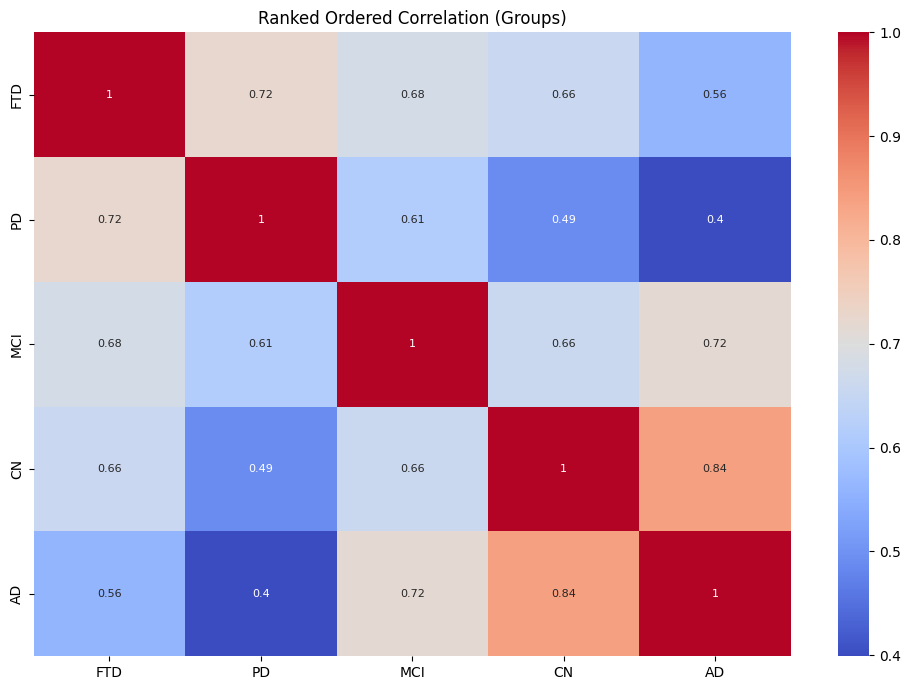

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sorted_correlation_matrix(sorted_corr_matrix, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 8})
    plt.title('Ranked Ordered Correlation (Groups)')
    plt.tight_layout()
    plt.show()

# Graficar la matriz ordenada
plot_sorted_correlation_matrix(sorted_corr_matrix, sorted_labels)


# Clasificador

In [207]:
import pandas as pd

# Cargar los dataframes desde los archivos Excel
df_CN_results_ = pd.read_excel('results/df_CN_results.xlsx')
df_AD_results_ = pd.read_excel('results/df_AD_results.xlsx')
df_FTD_results_ = pd.read_excel('results/df_FTD_results.xlsx')
df_MCI_results_ = pd.read_excel('results/df_MCI_results.xlsx')
df_PD_results_ = pd.read_excel('results/df_PD_results.xlsx')

# Agregar la columna Diagnosis a cada dataframe antes de concatenar
df_CN_results_['Diagnosis'] = 1  # CN
df_AD_results_['Diagnosis'] = 2  # AD
df_FTD_results_['Diagnosis'] = 2  # FTD
df_MCI_results_['Diagnosis'] = 2  # MCI
df_PD_results_['Diagnosis'] = 2  # PD

# Combinar todos los dataframes
df_results_combined = pd.concat([df_CN_results_, df_AD_results_, df_FTD_results_, df_MCI_results_, df_PD_results_], ignore_index=True)

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['y_labels'].median()
df_results_combined['brain_age_class'] = df_results_combined['y_labels'].apply(lambda x: 1 if x > median_brain_age else 0)



In [208]:
# Definir X e y
X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI', 'Diagnosis']]
y = df_results_combined['brain_age_class']
#y_binario = y.replace({1: 0, 2: 1})

In [185]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y_binario, test_size=0.2, random_state=42, stratify=X['Diagnosis'])
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=126)


In [171]:
import xgboost as xgb
#from base_regressor_ import BaseRegressor
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

model_ml = xgb.XGBClassifier
params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }
opt_model = BayesSearchCV(
            estimator=model_ml(),
            search_spaces=params_space,
            #fit_params=self.fit_param,
            cv=kf,
            n_iter=10,
            #scoring='neg_mean_absolute_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
                
opt_model.fit(X, y)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


BayesSearchCV(cv=KFold(n_splits=10, random_state=126, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,...
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              n_iter=10, n_jobs=-1, random_state=42,
              search_spaces={'colsample_bytree': (0.8, 0.9, 1.0),
                             'eval_metric': ['logloss', 'error', 'auc',
                                             'aucpr'],
                             'learning_rate': (0.01, 0.1, 0.2),
                             'max_depth': (3, 4, 5),
                             'objective': ['binary:logistic'],
                             'reg_alpha': (0, 0.1, 1.0),
                             'reg_lambda': (0, 0.1, 1.0),
                             'subsample': (0.8, 0.9, 1.0)},
              verbose=1)

In [172]:
best_param_=opt_model.best_params_

In [181]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

def clf_metrics(y_true, y_pred, y_prob):
    # ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_value = auc(fpr, tpr)
    
    # Other classification metrics
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    return [auc_value, fpr, tpr, thresholds, f1, accuracy, recall, precision, cm]


In [186]:
metrics = ['auc', 'fpr', 'tpr', 'thresholds', 'f1_score', 'accuracy_score', 'recall_score', 'precision_score', 'confusion_matrix']
results = {
    'train': {m:[] for m in metrics},
    'val'  : {m:[] for m in metrics},
    'test' : {m:[] for m in metrics},
    'model': []
}
kf_splits = list(kf.split(X, y_binario))

for fold in range(n_splits):
    train_index, test_index = kf_splits[fold]
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_val_kf = y_binario.iloc[train_index], y_binario.iloc[test_index]
    
    model = model_ml(**best_param_)
    model.fit(X_train_kf, y_train_kf)

    # Predictions
    y_pred_train = model.predict(X_train_kf)
    y_prob_train = model.predict_proba(X_train_kf)[:, 1]  # Probabilidades para la clase positiva
    train_metrics = clf_metrics(y_train_kf, y_pred_train, y_prob_train)

    y_pred_val = model.predict(X_val_kf)
    y_prob_val = model.predict_proba(X_val_kf)[:, 1]
    val_metrics = clf_metrics(y_val_kf, y_pred_val, y_prob_val)

    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]
    test_metrics = clf_metrics(y_test, y_pred_test, y_prob_test)

    # Almacenar los resultados de las métricas
    for ds in ['train', 'val', 'test']:
        if ds == 'train':
            metrics_set = train_metrics
        elif ds == 'val':
            metrics_set = val_metrics
        else:
            metrics_set = test_metrics

        for i, metric in enumerate(metrics):
            results[ds][metric].append(metrics_set[i])

    # Almacenar el modelo
    results['model'].append(model)


In [187]:
results

{'train': {'auc': [0.8271116631799162,
   0.8118126022913257,
   0.8191684844218721,
   0.8276554785338259,
   0.8180842204950689,
   0.8198888111630647,
   0.8182544025876434,
   0.811690432354538,
   0.8170306819715303,
   0.8201226988850014],
  'fpr': [array([0.        , 0.        , 0.        , 0.        , 0.00195312,
          0.00195312, 0.00195312, 0.00195312, 0.00195312, 0.00195312,
          0.00390625, 0.00390625, 0.00390625, 0.00585938, 0.00585938,
          0.00585938, 0.00585938, 0.00585938, 0.01367188, 0.01367188,
          0.01367188, 0.01367188, 0.015625  , 0.015625  , 0.01757812,
          0.01757812, 0.01757812, 0.01953125, 0.07617188, 0.078125  ,
          0.078125  , 0.078125  , 0.078125  , 0.078125  , 0.08007812,
          0.08203125, 0.08203125, 0.08203125, 0.08398438, 0.08398438,
          0.0859375 , 0.08789062, 0.08789062, 0.09179688, 0.09179688,
          0.09179688, 0.09375   , 0.09375   , 0.09375   , 0.09375   ,
          0.09765625, 0.09765625, 0.09765625, 0

# Shap Agreement


In [99]:
shap_summary_dict_CN = dict(shap_summary_sorted_CN)
shap_summary_dict_AD = dict(shap_summary_sorted_AD)
shap_summary_dict_FTD = dict(shap_summary_sorted_FTD)
shap_summary_dict_MCI = dict(shap_summary_sorted_MCI)
shap_summary_dict_PD = dict(shap_summary_sorted_PD)

In [194]:
def calcular_suma_shap_por_grupo(shap_dict):
    """
    Calcula la suma de los valores SHAP por subregión para un grupo dado.
    
    Parámetros:
    shap_dict (dict): Diccionario que contiene los valores SHAP para cada grupo.

    Retorna:
    dict: Diccionario con la suma de los valores SHAP por subregión.
    """
    # Definir las regiones como listas
    OCC_left = [
        'Low_subj_spec_EPP_OCC_left', 'IAF_OCC_left', 'Alpha2_canon_EPP_OCC_left', 
        'Alpha2_canon_RPD_OCC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left'
    ]

    OCC_right = [
        'Low_subj_spec_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_right', 
        'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_OCC_right'
    ]

    HPC_left = [
        'Low_subj_spec_RPD_HPC_left', 'IAF_HPC_left', 'Low_subj_spec_EPP_HPC_left', 
        'TF_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 
        'High_subj_spec_EPP_HPC_left', 'High_subj_spec_RPD_HPC_left'
    ]

    HPC_right = [
        'Low_subj_spec_RPD_HPC_right', 'IAF_HPC_right', 'Alpha2_canon_EPP_HPC_right', 
        'Alpha2_canon_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 
        'TF_HPC_right'
    ]

    PARIET_left = [
        'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 
        'High_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_left', 
        'Low_subj_spec_RPD_PARIET_left'
    ]

    PARIET_right = [
        'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_PARIET_right', 
        'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 
        'Low_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right'
    ]

    CING_left = [
        'Low_subj_spec_EPP_CING_left', 'Alpha2_canon_RPD_CING_left', 
        'High_subj_spec_EPP_CING_left', 'High_subj_spec_RPD_CING_left', 
        'Low_subj_spec_RPD_CING_left'
    ]

    CING_right = [
        'Low_subj_spec_EPP_CING_right', 'Alpha2_canon_RPD_CING_right', 
        'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 
        'Low_subj_spec_RPD_CING_right'
    ]

    ORB_left = ['IAF_ORB_left', 'TF_ORB_left']
    ORB_right = ['IAF_ORB_right', 'TF_ORB_right']

    INS_left = ['IAF_INS_left', 'TF_INS_left']
    INS_right = ['IAF_INS_right', 'TF_INS_right']

    IFG_left = ['TF_IFG_left', 'IAF_IFG_left']
    IFG_right = ['TF_IFG_right', 'IAF_IFG_right']

    SFG_left = ['TF_SFG_left', 'IAF_SFG_left']
    SFG_right = ['TF_SFG_right', 'IAF_SFG_right']

    MFG_left = ['IAF_MFG_left', 'TF_MFG_left']
    MFG_right = ['IAF_MFG_right', 'TF_MFG_right']

    # Lista de regiones
    regiones = [
        OCC_left, OCC_right, HPC_left, HPC_right, 
        PARIET_left, PARIET_right, CING_left, CING_right, 
        ORB_left, ORB_right, INS_left, INS_right, 
        IFG_left, IFG_right, SFG_left, SFG_right, 
        MFG_left, MFG_right
    ]

    # Nombres de las regiones
    nombres_regiones = [
        'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
        'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
        'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
        'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
        'MFG_left', 'MFG_right'
    ]
    
    # Diccionario para almacenar las sumas de SHAP por subregión
    shap_sumas_subregion = {}

    # Iterar sobre cada subregión y sumar los valores SHAP
    for nombre, subregion in zip(nombres_regiones, regiones):
        suma_shap = 0
        for elemento in subregion:
            if elemento in shap_dict:
                suma_shap += shap_dict[elemento]
        
        # Guardar la suma en el diccionario con el nombre de la subregión
        shap_sumas_subregion[nombre] = suma_shap

    return shap_sumas_subregion

# Definir los diccionarios de SHAP para cada grupo
shap_summary_dict_CN = dict(shap_summary_sorted_CN)
shap_summary_dict_AD = dict(shap_summary_sorted_AD)
shap_summary_dict_FTD = dict(shap_summary_sorted_FTD)
shap_summary_dict_MCI = dict(shap_summary_sorted_MCI)
shap_summary_dict_PD = dict(shap_summary_sorted_PD)

# Crear un diccionario con los nombres de los grupos y sus respectivos diccionarios SHAP
grupos_shap = {
    'CN': shap_summary_dict_CN,
    'AD': shap_summary_dict_AD,
    'FTD': shap_summary_dict_FTD,
    'MCI': shap_summary_dict_MCI,
    'PD': shap_summary_dict_PD
}

# Iterar sobre cada grupo y calcular la suma de SHAP por subregión
resultados_suma_shap_region = {}
for grupo, shap_dict in grupos_shap.items():
    resultados_suma_shap_region[grupo] = calcular_suma_shap_por_grupo(shap_dict)

# Imprimir resultados
for grupo, sumas in resultados_suma_shap_region.items():
    print(f"Suma de SHAP por subregión para el grupo {grupo}:")
    for subregion, suma in sumas.items():
        print(f"  {subregion}: {suma}")
    print("\n")


Suma de SHAP por subregión para el grupo CN:
  OCC_left: 25.697256875790462
  OCC_right: 148.18228727692173
  HPC_left: 271.96276099154744
  HPC_right: 304.08893707131665
  PARIET_left: 181.5823243372519
  PARIET_right: 60.013209060804925
  CING_left: 6.849761602713035
  CING_right: 3.379420940500757
  ORB_left: 95.82547562739937
  ORB_right: 4.298181099365395
  INS_left: 55.639987742690735
  INS_right: 87.22063614778378
  IFG_left: 0.0
  IFG_right: 57.375938530364984
  SFG_left: 0.5912238106089898
  SFG_right: 5.247622474082679
  MFG_left: 0.09627752442482905
  MFG_right: 0.07071785107669412


Suma de SHAP por subregión para el grupo AD:
  OCC_left: 11.820944784268024
  OCC_right: 70.83613100307136
  HPC_left: 127.11566401236665
  HPC_right: 150.57281966118626
  PARIET_left: 84.86799296044477
  PARIET_right: 28.706788544960318
  CING_left: 3.3281397015865335
  CING_right: 1.6662618667590492
  ORB_left: 44.564293597067085
  ORB_right: 1.7928057005811022
  INS_left: 25.827732088998047
 

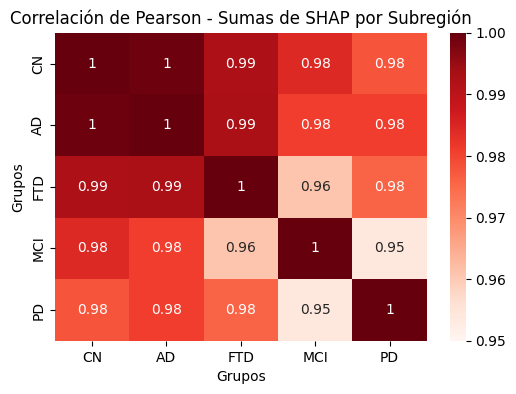

In [199]:
import numpy as np
from scipy.stats import pearsonr  # Cambia de spearmanr a pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación (correlación de Pearson) entre las sumas de SHAP por grupo
def compute_correlation_shap(shap_values):
    """
    Calcula la matriz de correlación (Pearson) entre los grupos usando los valores de SHAP sumados.
    
    Parámetros:
    shap_values (dict): Diccionario con las sumas de SHAP por grupo y características/subregiones.
    
    Retorna:
    np.ndarray: Matriz de correlación (5x5).
    """
    grupos = list(shap_values.keys())  # Nombres de los grupos
    shap_sums_arrays = [np.array(list(shap_values[grupo].values())) for grupo in grupos]

    # Calcular la correlación de Pearson
    corr_matrix = np.array([[pearsonr(x, l)[0] for l in shap_sums_arrays] for x in shap_sums_arrays])
    
    return corr_matrix, grupos

# Generar la matriz de correlación para los resultados de SHAP por subregión
corr_matrix_region, grupos_region = compute_correlation_shap(resultados_suma_shap_region)

# Crear el mapa de calor de la matriz de correlación
def graficar_mapa_correlacion(corr_matrix, grupos, titulo, vmin=0.85, vmax=1):
    """
    Genera un mapa de calor a partir de la matriz de correlación de sumas SHAP por grupo.
    
    Parámetros:
    corr_matrix (np.ndarray): Matriz de correlación (5x5).
    grupos (list): Lista con los nombres de los grupos.
    titulo (str): Título del mapa de calor.
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, xticklabels=grupos, yticklabels=grupos, cmap="Reds", vmin=vmin, vmax=vmax)
    plt.title(titulo)
    plt.xlabel("Grupos")
    plt.ylabel("Grupos")
    plt.show()

# Graficar la matriz de correlación para las sumas SHAP por subregión
graficar_mapa_correlacion(corr_matrix_region, grupos_region, "Correlación de Pearson - Sumas de SHAP por Subregión", vmin=0.95, vmax=1)


In [156]:
grupos = list(resultados_suma_shap_region.keys())  # Nombres de los grupos
shap_sums = [resultados_suma_shap_region[grupo].values() for grupo in grupos]  # Sumas de SHAP por grupo
shap_sums_arrays = [np.array(list(resultados_suma_shap_region[grupo].values())) for grupo in grupos]


In [180]:
def calcular_suma_shap_por_caracteristica(shap_dict):
    """
    Calcula la suma de los valores SHAP por grupo de características para un grupo dado.
    
    Parámetros:
    shap_dict (dict): Diccionario que contiene los valores SHAP para un grupo específico.

    Retorna:
    dict: Diccionario con la suma de los valores SHAP por grupo de características.
    """
    
    # Características agrupadas
    IAF = [
        'IAF_OCC_left', 'IAF_OCC_right', 'IAF_HPC_left', 'IAF_HPC_right', 
        'IAF_ORB_left', 'IAF_ORB_right', 'IAF_INS_left', 'IAF_INS_right', 
        'IAF_IFG_left', 'IAF_IFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 
        'IAF_MFG_left', 'IAF_MFG_right'
    ]

    Alpha2_canon = [
        'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 
        'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 
        'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 
        'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 
        'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 
        'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 
        'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right'
    ]

    Low_subj_spec = [
        'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 
        'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 
        'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 
        'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 
        'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 
        'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 
        'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 
        'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right'
    ]

    High_subj_spec = [
        'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 
        'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 
        'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 
        'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 
        'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 
        'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 
        'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 
        'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right'
    ]

    TF = [
        'TF_IFG_left', 'TF_IFG_right', 'TF_HPC_left', 'TF_HPC_right', 
        'TF_SFG_left', 'TF_SFG_right', 'TF_ORB_left', 'TF_ORB_right', 
        'TF_INS_left', 'TF_INS_right', 'TF_MFG_left', 'TF_MFG_right'
    ]

    # Lista de características
    caracteristicas = [IAF, Alpha2_canon, Low_subj_spec, High_subj_spec, TF]

    # Nombres de las características
    nombres_caracteristicas = ['IAF', 'Alpha2_canon', 'Low_subj_spec', 'High_subj_spec', 'TF']
    
    # Diccionario para almacenar las sumas de SHAP por característica
    shap_sumas_caracteristica = {}

    # Iterar sobre cada característica y sumar los valores SHAP
    for nombre, grupo in zip(nombres_caracteristicas, caracteristicas):
        suma_shap = 0
        for elemento in grupo:
            if elemento in shap_dict:
                suma_shap += shap_dict[elemento]
        
        # Guardar la suma en el diccionario con el nombre de la característica
        shap_sumas_caracteristica[nombre] = suma_shap

    return shap_sumas_caracteristica


# Definir los diccionarios de SHAP para cada grupo
shap_summary_dict_CN = dict(shap_summary_sorted_CN)
shap_summary_dict_AD = dict(shap_summary_sorted_AD)
shap_summary_dict_FTD = dict(shap_summary_sorted_FTD)
shap_summary_dict_MCI = dict(shap_summary_sorted_MCI)
shap_summary_dict_PD = dict(shap_summary_sorted_PD)

# Crear un diccionario con los nombres de los grupos y sus respectivos diccionarios SHAP
grupos_shap = {
    'CN': shap_summary_dict_CN,
    'AD': shap_summary_dict_AD,
    'FTD': shap_summary_dict_FTD,
    'MCI': shap_summary_dict_MCI,
    'PD': shap_summary_dict_PD
}

# Iterar sobre cada grupo y calcular la suma de SHAP por característica
resultados_suma_shap_caracteristicas = {}
for grupo, shap_dict in grupos_shap.items():
    resultados_suma_shap_caracteristicas[grupo] = calcular_suma_shap_por_caracteristica(shap_dict)

# Imprimir resultados
for grupo, sumas in resultados_suma_shap_caracteristicas.items():
    print(f"Suma de SHAP por característica para el grupo {grupo}:")
    for caracteristica, suma in sumas.items():
        print(f"  {caracteristica}: {suma}")
    print("\n")


Suma de SHAP por característica para el grupo CN:
  IAF: 311.63231373724153
  Alpha2_canon: 209.3403634380647
  Low_subj_spec: 648.8881221136492
  High_subj_spec: 13.559504068145436
  TF: 124.70171560754335


Suma de SHAP por característica para el grupo AD:
  IAF: 149.66786850515217
  Alpha2_canon: 97.0120518358871
  Low_subj_spec: 314.82222800302463
  High_subj_spec: 5.391793024947487
  TF: 55.64894615679122


Suma de SHAP por característica para el grupo FTD:
  IAF: 22.57938736126074
  Alpha2_canon: 20.591369219965276
  Low_subj_spec: 55.506297848081985
  High_subj_spec: 1.0307660098721594
  TF: 9.96323911430944


Suma de SHAP por característica para el grupo MCI:
  IAF: 102.1123405603905
  Alpha2_canon: 48.00747711271016
  Low_subj_spec: 167.99059472860688
  High_subj_spec: 2.6793595339794045
  TF: 38.49815880733813


Suma de SHAP por característica para el grupo PD:
  IAF: 22.061478501516238
  Alpha2_canon: 14.285573341979354
  Low_subj_spec: 54.148583539441866
  High_subj_spec: 1

In [181]:
resultados_suma_shap_caracteristicas

{'CN': {'IAF': 311.63231373724153,
  'Alpha2_canon': 209.3403634380647,
  'Low_subj_spec': 648.8881221136492,
  'High_subj_spec': 13.559504068145436,
  'TF': 124.70171560754335},
 'AD': {'IAF': 149.66786850515217,
  'Alpha2_canon': 97.0120518358871,
  'Low_subj_spec': 314.82222800302463,
  'High_subj_spec': 5.391793024947487,
  'TF': 55.64894615679122},
 'FTD': {'IAF': 22.57938736126074,
  'Alpha2_canon': 20.591369219965276,
  'Low_subj_spec': 55.506297848081985,
  'High_subj_spec': 1.0307660098721594,
  'TF': 9.96323911430944},
 'MCI': {'IAF': 102.1123405603905,
  'Alpha2_canon': 48.00747711271016,
  'Low_subj_spec': 167.99059472860688,
  'High_subj_spec': 2.6793595339794045,
  'TF': 38.49815880733813},
 'PD': {'IAF': 22.061478501516238,
  'Alpha2_canon': 14.285573341979354,
  'Low_subj_spec': 54.148583539441866,
  'High_subj_spec': 1.0811084294971074,
  'TF': 9.111306007765378}}

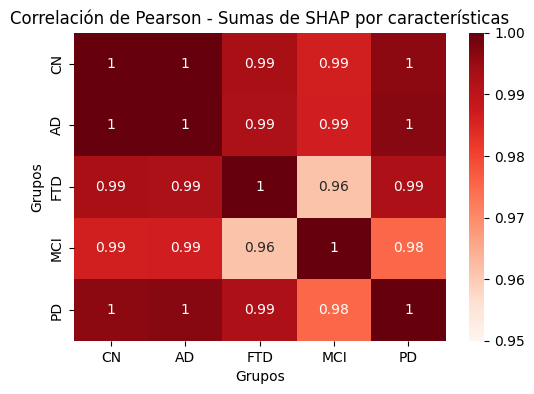

In [198]:
import numpy as np
from scipy.stats import pearsonr  # Cambiado de spearmanr a pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación (correlación de Pearson) entre las sumas de SHAP por grupo
def compute_correlation_shap(shap_values):
    """
    Calcula la matriz de correlación (Pearson) entre los grupos usando los valores de SHAP sumados.
    
    Parámetros:
    shap_values (dict): Diccionario con las sumas de SHAP por grupo y características/subregiones.
    
    Retorna:
    np.ndarray: Matriz de correlación (5x5).
    """
    grupos = list(shap_values.keys())  # Nombres de los grupos
    shap_sums_arrays = [np.array(list(shap_values[grupo].values())) for grupo in grupos]  # Sumas de SHAP por grupo

    # Calcular la correlación de Pearson
    corr_matrix = np.array([[pearsonr(x, l)[0] for l in shap_sums_arrays] for x in shap_sums_arrays])
    
    return corr_matrix, grupos

# Generar la matriz de correlación para los resultados de SHAP por subregión
corr_matrix, grupos = compute_correlation_shap(resultados_suma_shap_caracteristicas)

# Crear el mapa de calor de la matriz de correlación
def graficar_mapa_correlacion(corr_matrix, grupos, titulo, vmin=0.85, vmax=1):
    """
    Genera un mapa de calor a partir de la matriz de correlación de sumas SHAP por grupo,
    con la posibilidad de ajustar el rango de la escala de colores.
    
    Parámetros:
    corr_matrix (np.ndarray): Matriz de correlación (5x5).
    grupos (list): Lista con los nombres de los grupos.
    titulo (str): Título del mapa de calor.
    vmin (float): Valor mínimo de la escala de colores.
    vmax (float): Valor máximo de la escala de colores.
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, xticklabels=grupos, yticklabels=grupos, cmap="Reds", vmin=vmin, vmax=vmax)
    plt.title(titulo)
    plt.xlabel("Grupos")
    plt.ylabel("Grupos")
    plt.show()

# Graficar la matriz de correlación para las sumas SHAP por subregión, ajustando vmin y vmax
graficar_mapa_correlacion(corr_matrix, grupos, "Correlación de Pearson - Sumas de SHAP por características", vmin=0.95, vmax=1)

